# Trabalho 3

Nome: Heloísa Pazeti<br>
N° USP: 14577991 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

## Atividade 1

Pesquisar de onde vem a fórmula dada em 6.1. Pode usar o livro de Quarteroni e Salieri (recomendado no inicio do semestre) ou qualquer outro livro de cálculo numérico que você preferir.

$$\tag{6.1} x^{(k+1)}=x^{(k)}-\frac{r(x^{(k)})}{r'(x^{(k)})}$$

#### Resposta

Segundo o livro: Cálculo Científico Com Matlab e Octave - Quarteroni e Saleri - Seção 2.2


Se tivermos uma função $r$ podemos conseguir valores mais aproximados para a função se utilizamos a função $r$ e sua derivada. Nesse caso obteríamos algo como: $y(x)=r(x^{(k)})+r'(x^{(k)})(x-x^{(k)})$. Essa equação proporciona a tangente da curva $(x, r(x))$ no ponto $x^{(k)}$. Se queremos que $x^{(k+1)}$ seja tal que $y(x^{(k+1)})=0$, obtemos a equação $(6.1)$.

Além disso, se desenrolamos a função $r$ utilizando Séries de Taylor em torno de um ponto genérico $x^{(k)}$ obteremos algo como:

$$ r(x^{(k+1)})=r(x^{(k)})+\delta^{(k)}r'(x^{(k)})+O((\delta^{(k)})^2)$$

Onde $ \delta ^{(k)} = x^{(k+1)}-x^{(k)}$, forçando $r(x^{(k+1)})$ a ser zero e se depreciamos $O((\delta^{(k)})^2)$, obtemos uma aproximação de $(6.1)$

## Atividade 2

Programar e aplicar o método para encontrar as raizes da função:


$$r(x)=\cos(x)-x$$


Conferir o resultado usando a função: `x = scipy.optimize.fsolve(fun, x0, fprime=derfun)`

In [12]:
# Definindo função

def R_Function(x, *args):
    return (np.cos(x) - x)

# Calculando Função de Derivada

def Derivadas(x, funcao, dist):
    resC = (funcao(x + dist) - funcao(x - dist))/(2*dist)
    return resC

def R_Der(x):
    return Derivadas(x, R_Function, 1e-1)

# Metódo de Newton

def Newton_Method(x0, tol, max_it):
    k = 0
    e = tol + 1
    delta = 0
    xk = x0

    while((e > tol) and (k < max_it)):
        delta = - (R_Function(xk))/(R_Der(xk))
        xk += delta
        e = (abs(delta))/(abs(xk - delta))          # Se x(k+1) = xk + delta -> x(k+1) - xk = delta
        k += 1

    return xk


In [53]:
x0 = 2

print("\n\n>>>> Para um chute inicial de x0 =", x0 , ":\n")
r1 = scipy.optimize.fsolve(R_Function, x0, R_Der)
print("Raiz encontrada pelo SCIPY: ", r1[0])

r2 = Newton_Method(x0, 10**-5, 1000)
print("Raiz encontrada pelo Método de Newton", r2)

_x0 = 100000

print("\n\n>>>> Para um chute inicial de x0 =", _x0 , ":\n")
r1 = scipy.optimize.fsolve(R_Function, _x0, R_Der)
print("Raiz encontrada pelo SCIPY: ", r1[0])

r2 = Newton_Method(_x0, 10**-5, 1000)
print("Raiz encontrada pelo Método de Newton", r2)



>>>> Para um chute inicial de x0 = 2 :

Raiz encontrada pelo SCIPY:  0.7390851332151606
Raiz encontrada pelo Método de Newton 0.739085133219901


>>>> Para um chute inicial de x0 = 100000 :

Raiz encontrada pelo SCIPY:  0.739085133215155
Raiz encontrada pelo Método de Newton 0.7390851333736944


## Atividade 3

Interpretar geometricamente o que está acontecendo no processo iterativo a cada passo.

In [42]:
def Newton_Method_Geo(x0, tol, max_it):
    k = 0
    e = tol + 1
    delta = 0
    xk = x0
    x_values = []
    k_values = []

    while((e > tol) and (k < max_it)):
        k_values.append(k)
        delta = - (R_Function(xk))/(R_Der(xk))
        xk += delta
        e = (abs(delta))/(abs(xk - delta)) # Se x(k+1) = xk + delta -> x(k+1) - xk = delta
        k += 1
        x_values.append(xk)

    return k_values, x_values

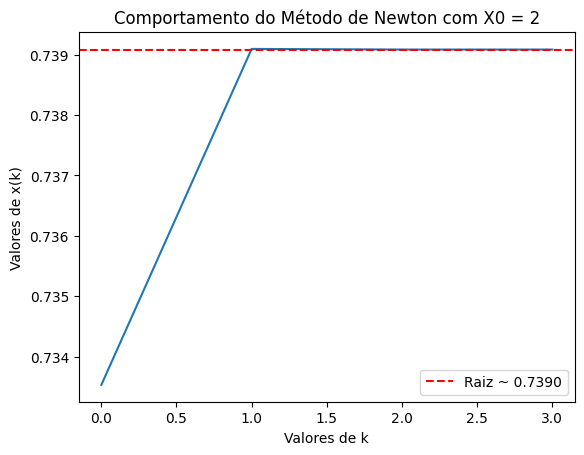

In [164]:
k_values, x_values = Newton_Method_Geo(2, 10**-5, 1000)

plt.plot(k_values, x_values)
plt.axhline(0.739085133219901, linestyle="--", color="r", label="Raiz ~ 0.7390")
plt.legend()
plt.title("Comportamento do Método de Newton com X0 = 2")
plt.ylabel("Valores de x(k)")
plt.xlabel("Valores de k")
plt.show()

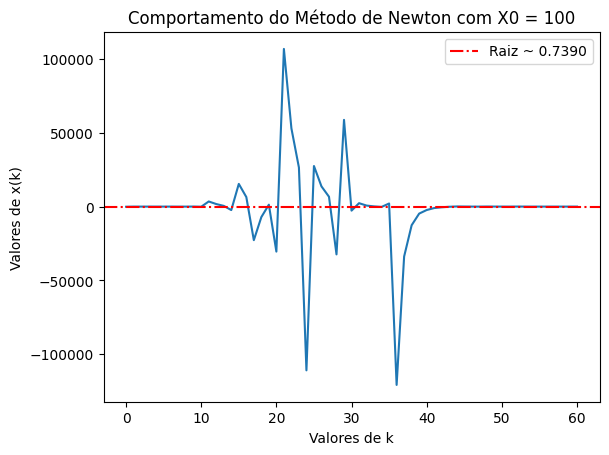

In [165]:
k_values, x_values = Newton_Method_Geo(100, 10**-5, 1000)

plt.plot(k_values, x_values)
plt.axhline(0.739085133219901, linestyle="-.", color="r", label="Raiz ~ 0.7390")
plt.legend()
plt.title("Comportamento do Método de Newton com X0 = 100")
plt.ylabel("Valores de x(k)")
plt.xlabel("Valores de k")
plt.show()

Aqui pode-se observar como o Método de Newton se comporta para diferentes valores do chute inicial. Para valores mais próximos do resultado nota-se que o método converge rapidamente para o valor final. Porém para chutes iniciais mais distante ou problemáticos de alguma forma, nota-se que o método tende a variar mais até finalmente convergir no ponto esperado.

## Atividade 4

Nos casos em que não sabemos calcular a derivada da função, precisamos aplicar uma fórmula de diferenciação numérica. Por exemplo, para o caso das redes hidráulicas, se quisermos saber em que valor do parâmatro $x$ a função $W(x)$ da potência consumida pela bomba é igual a 12, deveriamos aplicar o método de Newton na função:

$$r(x)=W(x)-12=0$$

Neste caso, quando precisarmos calcular a derivada de $W$ podemos fazer:

$$W'(x)=\frac{W(x+h)-W(x-h)}{2h}$$

(tomando algum ℎ pequeno, por exemplo $ℎ \approx 10^{−3}$). Agora, considerar uma rede com os seguintes parâmetros:

$$\begin{cases}n = 8 \\ m = 9 \\ QB = 3 \\ natm = n*n-1 \\ nB = 0\end{cases}$$

As condutâncias dependem de um parâmetro:

$$\begin{cases}CH = 2.3 + 10e^{-(x-5)²}\\ CV =1.8 + 10e^{-(x-5)²}\end{cases}$$

Determinar em que valores de $x$, $W(x) = 12$. Notar que dependendo do chute inicial $x^{(0)}$ o resultado poderá ser diferente. Fazer um gráfico da função e conferir se o resultado é correto.

#### Funções Criadas Anteriormente

In [60]:
# GERA REDE E RESOLUÇÃO

def GeraRede(nx,ny, X):
    nv = nx*ny
    nc = (nx-1)*ny + (ny-1)*nx
    
    coord = np.zeros(shape=(nv,2))

    for i in range(nx):
        for j in range(ny):
            ig = i + j*nx
            coord[ig,0] = i
            coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx-1):
            k = j*(nx-1) + i
            conec[k,0] = j*nx + i
            conec[k,1] = j*nx + i+1
            #C[k] = CH
            C[k] = 2.3 + 10*pow(math.e, -pow(X - 5, 2))
            

    # Loop sobre canos verticais
    for i in range(nx):
        for j in range(ny-1):
            k = (nx-1)*ny + j*nx + i
            conec[k,0] = i + j*nx
            conec[k,1] = i + (j+1)*nx
            #C[k] = CV
            C[k] = 1.8 + 10*pow(math.e, -pow(X - 5, 2))

    return nv, nc, conec, C, coord

def Assembly(conec, C, nv, nc):
    A = np.zeros(shape=(nv,nv))
    for k in range(nc):
        n1 = conec[k,0]
        n2 = conec[k,1]

        A[n1,n2] += -C[k]
        A[n2,n1] += -C[k]
        A[n1,n1] += C[k] 
        A[n2,n2] += C[k]
    
    return A

def SolveNetwork(conec, C, natm, nB, QB, nv, nc):
    Atilde = Assembly(conec, C, nv, nc)
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    
    b = np.zeros(shape=nv)
    b[nB] = QB
    pressure = np.linalg.solve(Atilde, b)
    return pressure

def GetDK(conec, C, nv, nc):
    K = np.zeros(shape=(nc,nc))
    D = np.zeros(shape=(nc,nv))
    
    for i in range(nc):                 # Coloca valor em todas as diagonais
        K[i,i] = C[i]

    for k in range(nc):                 # Ajuste dos indexes
        n1 = conec[k,0]
        n2 = conec[k,1]
        D[k,n1] = 1
        D[k,n2] = -1 

    return K, D

def CalculaPotencia(conec, P, C, nv, nc):

   K, D = GetDK(conec, C, nv, nc)
   return (np.transpose(P) @ (np.transpose(D) @ K @ D) @ P)

def CalcPot(x):
    n, m = 8, 9
    QB = 3
    nAtm = n*m - 1
    nB = 0

        
    nv, nc, conec, C, coord = GeraRede(n, m, x)
    P = SolveNetwork(conec, C, nAtm, nB, QB, nv, nc)
    W = CalculaPotencia(conec, P, C, nv, nc) 
        
    return W

#### Funções Para Atividade

In [73]:
def Pot_Func(x):
    W = CalcPot(x)
    return (W-12)

def Pot_Der(x):
    return Derivadas(x, Pot_Func, 10**-3)

def Derivadas(x, funcao, dist):
    resC = (funcao(x + dist) - funcao(x - dist))/(2*dist)

    return resC

In [92]:
def Newton_Method_Potencia(x0, tol, max_it):
    k = 0
    e = tol + 1
    xk = x0

    while((e > tol) and (k < max_it)):
        delta = - (Pot_Func(xk))/(Pot_Der(xk))
        xk += delta
        e = (abs(delta))/(abs(xk-delta))
        k += 1

    return xk


In [154]:
x0 = 3

print(">>>> Para um chute inicial de x0 =", x0 , ":")

r = Newton_Method(x0, 10**-5, 1000)
print("Raiz encontrada pelo Método de Newton: x(1) =", r)

_x0 = 7

print("\n\n>>>> Para um chute inicial de x0 =", _x0 , ":")

r = Newton_Method(_x0, 10**-5, 1000)
print("Raiz encontrada pelo Método de Newton: x(2)", r)

>>>> Para um chute inicial de x0 = 3 :
Raiz encontrada pelo Método de Newton: x(1) = 2.8608754536656122


>>>> Para um chute inicial de x0 = 7 :
Raiz encontrada pelo Método de Newton: x(2) 7.139124546334398


In [160]:
print("W(x1) = ", np.round(CalcPot(2.8608754536656122), 5))
print("W(x2) = ", np.round(CalcPot(7.139124546334398), 5))

W(x1) =  12.0
W(x2) =  12.0


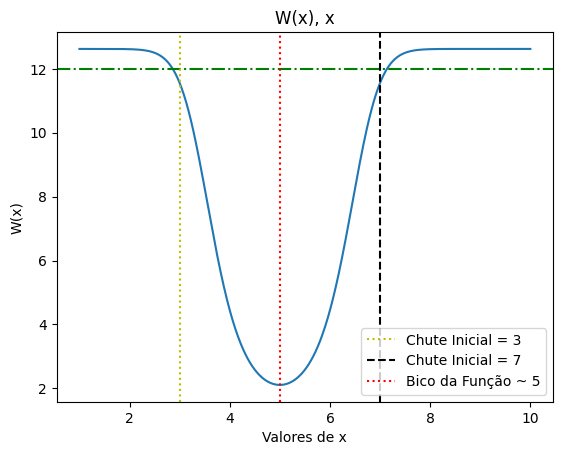

In [156]:
X = np.linspace(1, 10, 10**3)
W = []

for x in X:
    W.append(CalcPot(x))

plt.plot(X, W)
plt.title("W(x), x")
plt.xlabel("Valores de x")
plt.ylabel("W(x)")
plt.axhline(12, linestyle="-.", color="g")
plt.axvline(3, linestyle="dotted", color="y", label="Chute Inicial = 3")
plt.axvline(7, linestyle="--", color="k", label="Chute Inicial = 7")
plt.axvline(5, linestyle=":", color="r", label="Bico da Função ~ 5")
plt.legend()
plt.show()

Importante notar que pelo gráfico as raízes estariam por volta de 3 e 7, como foram os chutes dados inicialmente e pelo que foi encontrado na função. Além disso é importante notar que a linha tracejada vermelha que corresponde ao valor 5 mostra um bico da função. Esse valor de 5, assim como valores próximos as regiões horizontais da função (valores um pouco menores que 3 ou um pouco maiores que 7, por exemplo), se forem usados como chutes iniciais acabam gerando um erro no método, isso porque utilizar esses valores na derivada retorna um zero, gerando uma divisão por zero. Assim isso mostra que o método é eficiente, porém é necessário cuidado com os chutes dados, além de isso variar as respostas, também podemos acabar utilizando valores para os quais a derivada zera ou não existe, gerando resultados incorretos.

## Conclusões

Pela **atividade 2** foi mostrado como o método de Newton obtém valores corretos e precisos em relação a outros métodos computacionais, tendo a vantagem de ser simples e de, a depender da função, requerer poucas iterações para ser resolvido. Assim provando-se muito útil para se encontrar as raízes de uma função.

Pela **atividade 3** foi possível observar melhor o comportamento do Método de Newton e observar como o método converge para a resposta esperada. Foi observado que para valores mais distantes no chute inicial a curva do gráfico tendia a variar um pouco mais, mas sempre convergindo para o mesmo ponto com mais ou menos precisão.

Pela **atividade 4** foi observado outros pontos do Método de Newton, como, por exemplo, o quão importante é a escolha do chute inicial. Em uma função como a mostrada no gráfico existem diversos pontos onde a derivada da função é zero ou apenas não é definida. Se tentamos utilizar um desses pontos como chute inicial o método irá encontrar um problema como, por exemplo, uma divisão por zero, resultando numa resposta incorreta. Por isso é necessário ter uma ideia da resposta ou do comportamento da função para diferentes variáveis independentes.